# Gute Diagramme erstellen

## python konfigurieren

### Module importieren

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
import pandas as pd
import datetime as dt
import seaborn as sns
import plotly
import plotly.graph_objects as go
#import sys
import os
import os.path
#import platform
from PIL import Image
import requests
import scipy
from scipy.optimize import curve_fit
from IPython.display import Audio
from distutils.spawn import find_executable
import shutil

print('Versionen der verwendeten python-Module: ')
print('numpy', np.__version__)
print('matplotlib', matplotlib.__version__)
print('pandas', pd.__version__)
print('datetime', dt)
print('seaborn', sns.__version__)
print('plotly', plotly.__version__)
#print('sys', sys.version)
print('os', os)
#print('platform', platform.__version__)
print('Image', Image.__version__)
print('requests', requests.__version__)
print('scipy', scipy.__version__)
print('shutil', shutil)

Versionen der verwendeten python-Module: 
numpy 2.1.3
matplotlib 3.9.2
pandas 2.2.3
datetime <module 'datetime' from '/home/franzi/.pyenv/versions/miniconda3-latest/lib/python3.12/datetime.py'>
seaborn 0.13.2
plotly 5.24.1
os <module 'os' (frozen)>
Image 10.4.0
requests 2.32.3
scipy 1.14.1
shutil <module 'shutil' from '/home/franzi/.pyenv/versions/miniconda3-latest/lib/python3.12/shutil.py'>


### Grafikparameter einstellen

In [2]:
plt.rcParams['savefig.dpi'] = 75
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 18
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

if shutil.which('latex'): plt.rcParams['text.usetex'] = True

### Funktionen definieren

## Lernziele

<div class="admonition note" style="background: #e5f1ff; padding: 10px">
<div class="title"><b>LERNZIELE</b></div>
    <ul>
        <li> aussagekräftige, nicht irreführende, rasch verständliche Diagramme erstellen </li>
        <li> mithilfe von python Werkzeugen </li>
        <li> um effizient und verständlich komplexe Informationen zu kommunizieren </li>
    </ul>
</div>

## Schlechte Diagramme

<div class="admonition important" style="background: #e9f6ec; padding: 10px">
<div class="title"><b>AUFGABE</b></div>
    Wodurch zeichnen sich besonders <i>schlechte</i> Diagramme aus?
</div>

*Antwort:...*

Ein paar Beispiele:

<Axes: >

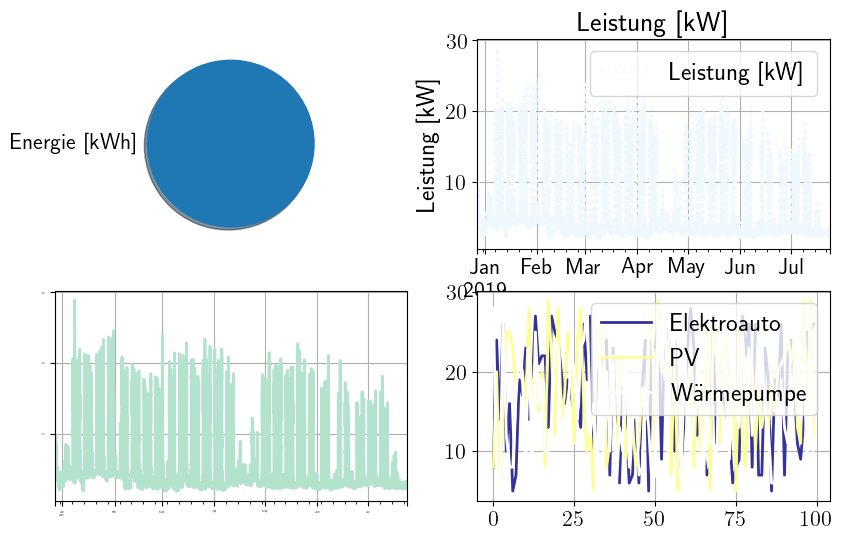

In [3]:
df = pd.read_csv('../data/openMeter-Realschule.csv', parse_dates = ['Zeit'], index_col=0, names=['Zeit','Leistung [kW]'], skiprows=1)
energy = sum(df['Leistung [kW]'])/4
fix, ax = plt.subplots(2,2)
ax[0,0].pie([energy,0],labels=['Energie [kWh]',''], shadow=True)
df.plot(kind = 'line', style=':', color='aliceblue', ax=ax[0,1], ylabel='Leistung [kW]', title='Leistung [kW]', grid=True)
df.plot(ax=ax[1,0], grid=True, colormap='Pastel2', legend=False, fontsize = 2, xlabel = '')
data = np.random.randint(5,30,size=(100,3))
df2 = pd.DataFrame(data, columns=['Elektroauto', 'PV', 'Wärmepumpe'])
df2.plot(ax=ax[1,1], grid = True, colormap = "terrain")

<div class="admonition important" style="background: #e9f6ec; padding: 10px">
<div class="title"><b>AUFGABE</b></div>
    Was ist an den gezeigten Diagrammen schlecht? Was müsste verändert werden, damit eine klare Botschaft rüberkommt?
</div>

*Antwort:...*

[Edward Tufte](https://www.edwardtufte.com/bboard/q-and-a-fetch-msg?msg_id=0000Jr) hat mehrere Bücher und den verlinkten Blog geschrieben, in dem er sagt, dass schlechte Diagramme "vollgemüllt" sind mit graphischen Zusatzelementen, die die eigentliche Botschaft der Daten verstecken. Es handelt sich häufig um wenig überzeugende ("thin") Daten. Gerne verwenden Autoren dafür dreidimensionale Abbildungen, deren Werte sich nicht ablesen lassen:

<>:17: SyntaxWarning: invalid escape sequence '\%'
<>:17: SyntaxWarning: invalid escape sequence '\%'
/tmp/ipykernel_13408/3199859381.py:17: SyntaxWarning: invalid escape sequence '\%'
  ax.set_zlabel('System savings [\%]')


Text(0.5, 0, 'System savings [\\%]')

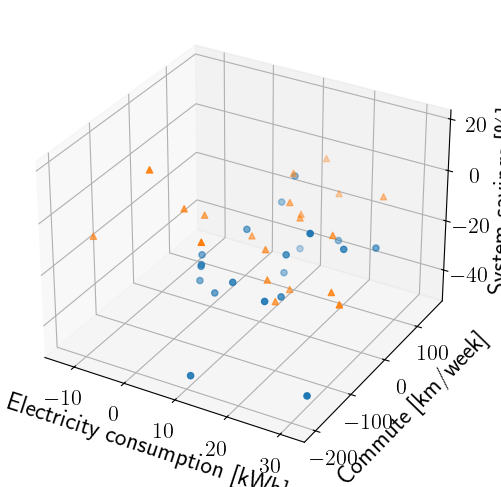

In [4]:
def randomized(n, minval, maxval):
    return (maxval - minval)*np.random.randn(n) + minval

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

n = 20

for m, min_z, max_z in [('o', -30, -15), ('^', -10, -1)]:
    x = randomized(n, 13, 21)
    y = randomized(n, 0, 100)
    z = randomized(n, min_z, max_z)
    ax.scatter(x, y, z, marker=m)

ax.set_xlabel('Electricity consumption [kWh]')
ax.set_ylabel('Commute [km/week]')
ax.set_zlabel('System savings [\%]')

## Gestaltung guter Diagramme

- aus Lesersicht effiziente Zusammenfassung von Informationen
 - schnell verständlich
 - klar beschriftet: Einheiten, Zahlen, Achsenbeschriftungen eindeutig
 - gut lesbar: Schriftgröße bei Präsentationen 16+, in Textdokumenten wie Text oder Text-1, z. B. Text in 12pt, dann Schriftgröße in Diagrammen 12pt oder 11pt
 - falls mehrere Graphen in einem Diagramm: Legende
- bei mehreren ähnlichen Diagrammen
 - Skala immer wieder gleich, so dass man sofort Unterschiede sieht
- gute Diagramme sind aufwendig
 - egal mit welchem Programm
 - hilfreicher Weg: verschiedene Darstellungen ausprobieren
 - bestes Diagramm zeigt **die Botschaft der Daten am klarsten und vernachlässigt keine wichtigen Details**

{cite:p}`rougier_ten_2014` zeigt 10 Tipps für gute Diagramme:

### Adressaten kennen

- Ein Diagramm für eigene Aufzeichnungen des Zwischenstands muss nicht so klar gestaltet sein, wie eins, das anderen Menschen, die nicht tief in Ihrer Arbeit stecken, präsentiert wird.

- Für eine wissenschaftliche Veröffentlichung ist es wichtig, dass das Diagramm korrekt ist und dass es alle relevanten Aussagen einem breiteren Publikum deutlich macht.

### Botschaft identifizieren

- Ein (gutes) Bild sagt mehr als 1000 Worte.

- Was ist die Botschaft des Diagramms? Welche Art von Darstellung bringt diese Botschaft am besten rüber?

- Wenn man ein Diagramm "auf einen Blick versteht", dann ist es sehr viel wahrscheinlicher, dass es verstanden wird.

### Passend zum Medium

- Medien können sein: Poster, Computer-Bildschirme, Beamerbild, Papier (gedruckte Artikel)

- daraus ergeben sich verschiedene Größen für Diagramme, z. B. bei einem Beamer-Vortrag, dass dickere Linien, größere Textelemente, Farben mit starkem Kontrast notwendig sind

- und es gibt verschiedene Wege der Interaktion mit dem Bild, z. B. wird ein Bild bei einem Vortrag nur kurz gezeigt, es muss rasch verstanden werden können, während man auch noch dem Vortrag lauscht

### Bildunterschriften sind nicht optional

- außer, die Informationen befinden sich im Bild, z. B. im Diagrammtitel, in den Achsenbeschriftungen, in Textelementen im Diagramm, etc.

- weitere Informationen, z. B. zum experimentellen Aufbau gehören in den Text, damit alles nachvollziehbar ist, auch alle Erklärungen, die Sie mündlich zu einem Diagramm geben würden

### Default (Voreinstellung) ist nicht immer am besten

- matplotlib hat einige Voreinstellungen, z. B. Schriftgröße, Farbgebung, Stil, Art der Achsenmarkierungen, etc.

- diese werden in den jupyter notebooks im Kurs immer schon ganz oben etwas angepasst

- diese Einstellungen werden oben angepasst, damit die Diagramme einheitlich aussehen

- jedoch ist es nötig, diese Einstellungen für manche Diagramme zu ändern, damit sie wirklich gut lesbar sind

### Farben effektiv nutzen

- Farben können helfen - oder verwirren

- es gibt drei Sorten Farbpaletten (siehe auch unten für die, die es in python gibt): sequenziell (für Daten, die von niedrig zu hoch variieren), divergent (um Änderungen in Bezug auf den Median darzustellen) oder qualitativ (besonders für diskrete oder kategorische Daten)

- zu ähnliche Farben können von Farbblinden nicht gut wahrgenommen werden

### Nicht den Leser in die Irre führen

- wissenschaftliche Diagramme sind keine Kunstwerke

- Daten sollen objektiv dargestellt werden

- meist sind Tortendiagramme und 3D Diagramme ungünstig, da man nichts quantitativ an den Skalen ablesen kann

- Daumenregel: immer den einfachst möglichen Diagrammtyp wählen, alles beschriften (aber nicht doppelt), Wertebereiche sinnvoll einstellen, Kollegen prüfen lassen

### Diagramm-Müll vermeiden

- alles, was unnötig ist, oder verwirrend ist, weglassen

- zu viele Farben, zu viele Beschriftungen, unnötige farbige Hintergründe, unnütze Gitterlinien, ...

- "Druckfarbe sparen"

- Beispiele für schlechte (und auch gute) Diagramme enthält der [Blog von Kaiser Fung](https://junkcharts.typepad.com/junk_charts/)

### Die Botschaft ist Trumpf über die Schönheit

- In jeder wissenschaftlichen Disziplin gibt es bestimmte standardisierte Darstellungen, die sich bewährt haben.

- Häufig muss man aber neue Diagramme gestalten, weil das so noch keiner untersucht hat.

- Natürlich kann man sich inspirieren lassen bei anderen Leuten, auch gerade im Internet, aber es ist wichtig, wissenschaftlich zu bleiben, d.h. dass die Botschaft wichtiger ist als die Schönheit eines Diagramms.

### Das richtige Werkzeug

- In diesem Kurs bleiben wir bei matplotlib bzw. den Werkzeugen in python.

- `matplotlib` inklusive Modulen für Sankey-Diagramme
- `seaborn` inklusive Modulen für heatmaps
- `plotly` für interaktive Plots
- `schemdraw` für elektrische Schaltungen
- **Formeln** mit `LaTeX` Syntax
- viele weitere

## Dataframes in Diagrammen darstellen

Die [pandas-Hilfe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html?highlight=pandas%20plot#pandas.DataFrame.plot) bietet hierzu eine gute Übersicht der relevanten Befehle.

## Farben anpassen

Mit dem Argument `color='Farbname'` können Sie die Farbe einer einzelnen Datenreihe ändern, eine Übersicht mit Farbnamen findet sich z. B. [in der Matplotlib Hilfe](https://matplotlib.org/stable/gallery/color/named_colors.html):

![Übersicht von Farbnamen in Matplotlib](https://matplotlib.org/stable/_images/sphx_glr_named_colors_003.png)

Um die gesamte Farbgebung eines Diagramms zu ändern, kann man die sog. `colormap = 'Name der Farbpalette'` anpassen, die Liste der Farbpaletten findet sich ebenfalls in der [Hilfe von Matplotlib](https://matplotlib.org/1.4.1/users/colormaps.html):

| Sequenzielle Farbpaletten | weitere sequenzielle | Divergente Farbpaletten | Qualitative Farbpaletten | Sonstige |
|---|---|---|---|---|
| ![Sequenzielle Farbpaletten](https://matplotlib.org/1.4.1/_images/grayscale_00.png) | ![Weitere sequenzielle](https://matplotlib.org/1.4.1/_images/grayscale_01.png) | ![Divergente Farbpaletten](https://matplotlib.org/1.4.1/_images/grayscale_02.png) | ![Qualitative Farbpaletten](https://matplotlib.org/1.4.1/_images/grayscale_03.png) | ![Sonstige](https://matplotlib.org/1.4.1/_images/grayscale_04.png) |

Im Folgenden sehen wir uns an, wie sich das auf die Darstellung von Heatmaps auswirkt:

### Schwarz-Weiß

Text(0.5, 1.0, 'Leistung einer Realschule [kW]\n Daten von openmeter.de')

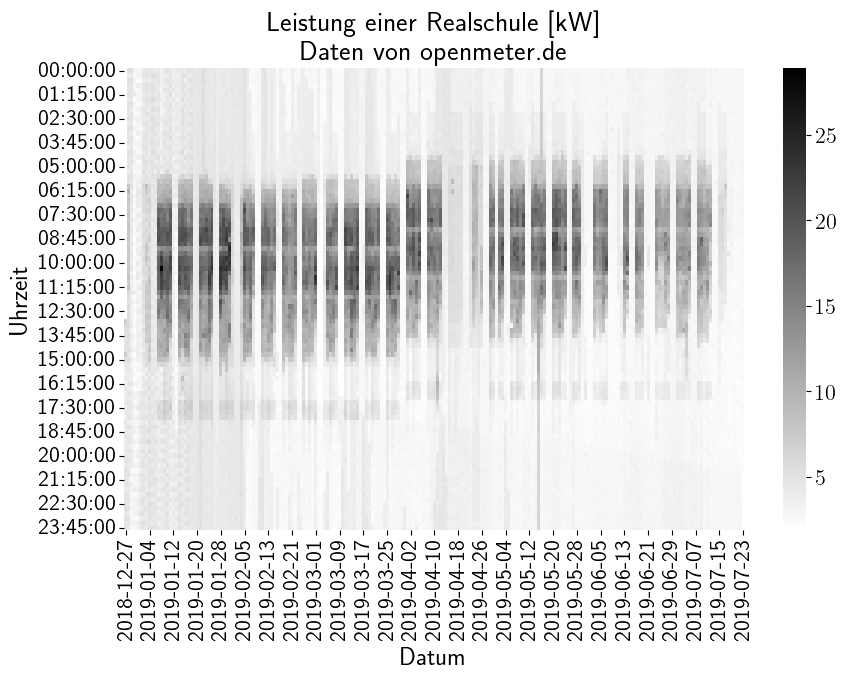

In [5]:
df['Datum'] = df.index.date
df['Uhrzeit'] = df.index.time
fig, ax = plt.subplots(figsize = (10,6))
sns.heatmap(df.pivot(index = 'Uhrzeit', columns = 'Datum', values = 'Leistung [kW]'), cmap = 'binary')
ax.set_title('Leistung einer Realschule [kW]\n Daten von openmeter.de')

### Blautöne

Text(0.5, 1.0, 'Leistung einer Realschule [kW]\n Daten von openmeter.de')

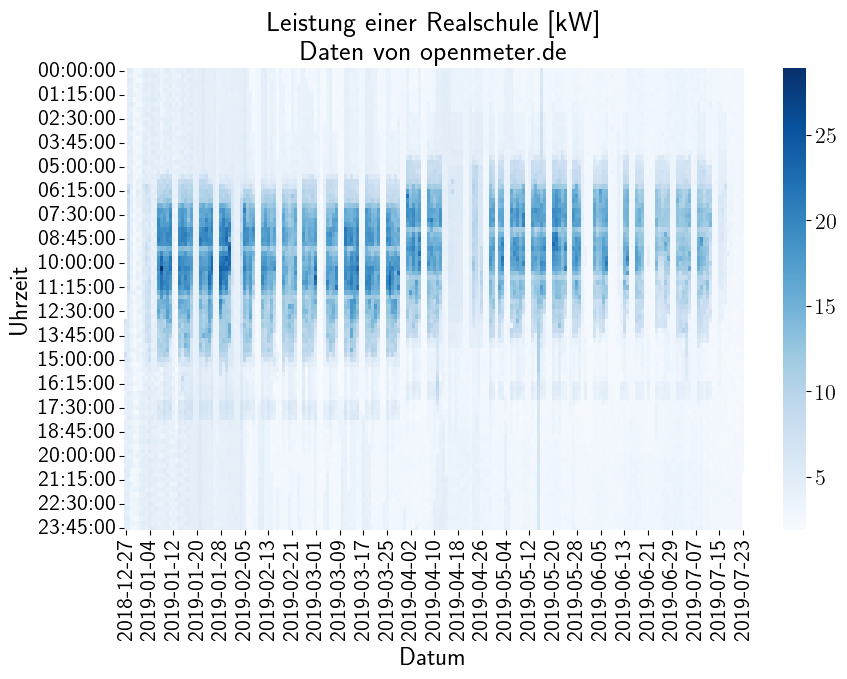

In [6]:
df['Datum'] = df.index.date
df['Uhrzeit'] = df.index.time
fig, ax = plt.subplots(figsize = (10,6))
sns.heatmap(df.pivot(index = 'Uhrzeit', columns = 'Datum', values = 'Leistung [kW]'), cmap = 'Blues')
ax.set_title('Leistung einer Realschule [kW]\n Daten von openmeter.de')

Blau scheint insgesamt für die Leistung eher irreführend, denn man assoziiert blau mit "kalt" und dann ist das hier aber die hohe Leistung, die sicher hohe Abwärme bedeutet. Das ist also eine ungünstige Farbpalette.

### Glühfarben

Text(0.5, 1.0, 'Leistung einer Realschule [kW]\n Daten von openmeter.de')

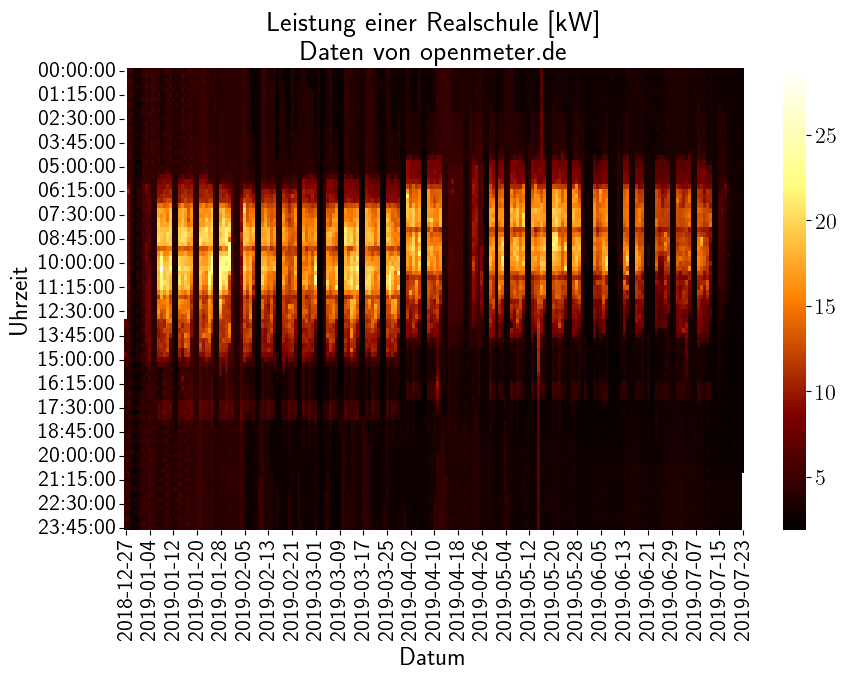

In [7]:
df['Datum'] = df.index.date
df['Uhrzeit'] = df.index.time
fig, ax = plt.subplots(figsize = (10,6))
sns.heatmap(df.pivot(index = 'Uhrzeit', columns = 'Datum', values = 'Leistung [kW]'), cmap = 'afmhot')
ax.set_title('Leistung einer Realschule [kW]\n Daten von openmeter.de')

Der Vorteil dieser Darstellung ist, dass man fehlende Daten (die weiß wären, siehe Randdaten) und niedrige Werte (schwarz) klar unterscheiden kann. Hohe Werte werden wie glühendes Metall dargestellt. Das ist intuitiv für die Darstellung von Energiedaten.

### Kühle

Text(0.5, 1.0, 'Leistung einer Realschule [kW]\n Daten von openmeter.de')

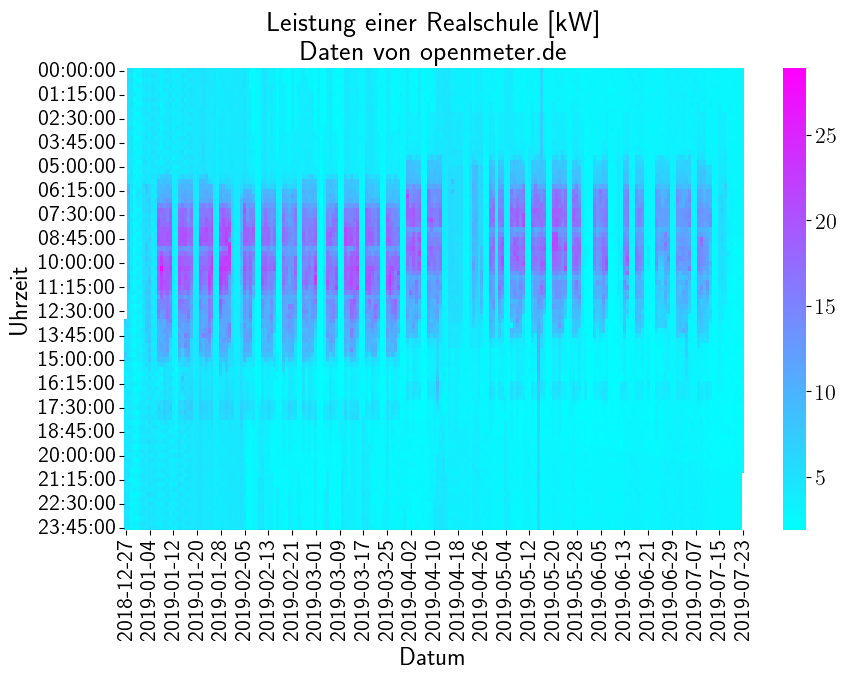

In [8]:
df['Datum'] = df.index.date
df['Uhrzeit'] = df.index.time
fig, ax = plt.subplots(figsize = (10,6))
sns.heatmap(df.pivot(index = 'Uhrzeit', columns = 'Datum', values = 'Leistung [kW]'), cmap = 'cool')
ax.set_title('Leistung einer Realschule [kW]\n Daten von openmeter.de')

Wer's mag ...

### Frühlingsfarben

Text(0.5, 1.0, 'Leistung einer Realschule [kW]\n Daten von openmeter.de')

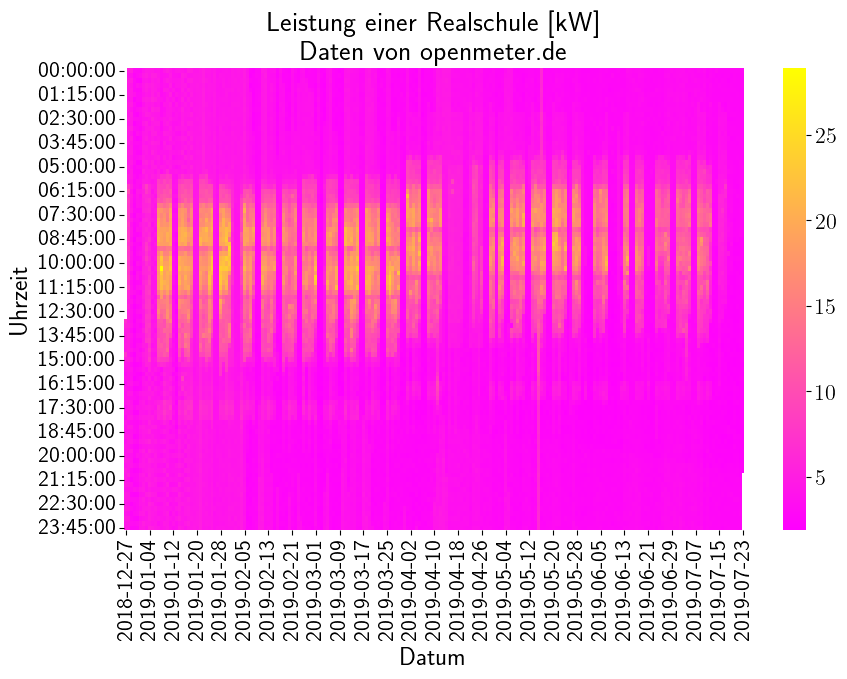

In [9]:
df['Datum'] = df.index.date
df['Uhrzeit'] = df.index.time
fig, ax = plt.subplots(figsize = (10,6))
sns.heatmap(df.pivot(index = 'Uhrzeit', columns = 'Datum', values = 'Leistung [kW]'), cmap = 'spring')
ax.set_title('Leistung einer Realschule [kW]\n Daten von openmeter.de')

Diese Farbgebung scheint eher unintuitiv, da das rötlichere pink die geringeren Leistungsbereiche beinhaltet.

### Divergent kühl-warm

Text(0.5, 1.0, 'Leistung einer Realschule [kW]\n Daten von openmeter.de')

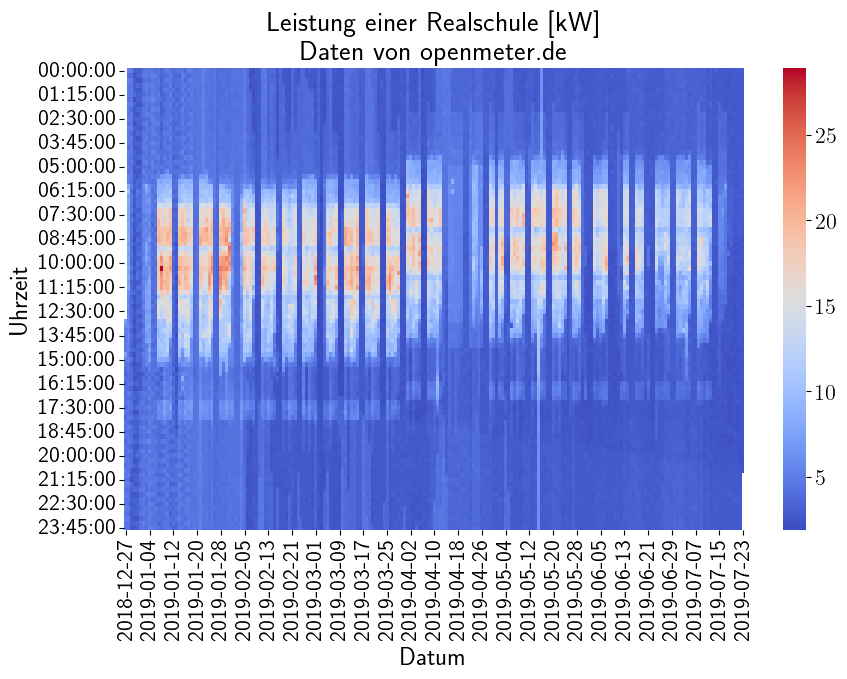

In [10]:
df['Datum'] = df.index.date
df['Uhrzeit'] = df.index.time
fig, ax = plt.subplots(figsize = (10,6))
sns.heatmap(df.pivot(index = 'Uhrzeit', columns = 'Datum', values = 'Leistung [kW]'), cmap = 'coolwarm')
ax.set_title('Leistung einer Realschule [kW]\n Daten von openmeter.de')

Intuitiv, noch besser passt die Darstellung sicher zu Temperaturdaten - siehe die Scientist for Future Temperatur-Darstellung.

### Divergent Rot-Schwarz

Text(0.5, 1.0, 'Leistung einer Realschule [kW]\n Daten von openmeter.de')

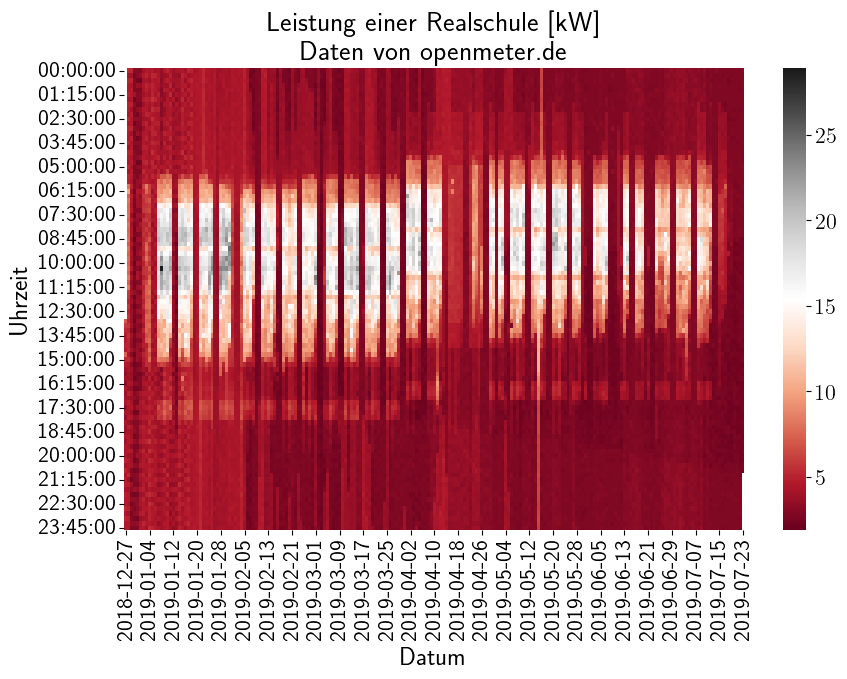

In [11]:
df['Datum'] = df.index.date
df['Uhrzeit'] = df.index.time
fig, ax = plt.subplots(figsize = (10,6))
sns.heatmap(df.pivot(index = 'Uhrzeit', columns = 'Datum', values = 'Leistung [kW]'), cmap = 'RdGy')
ax.set_title('Leistung einer Realschule [kW]\n Daten von openmeter.de')

Das ist weniger intuitiv, dass da die Werte mit niedriger Leistung rot sind und der Rest dann grau-schwarz.

### Akzent

Text(0.5, 1.0, 'Leistung einer Realschule [kW]\n Daten von openmeter.de')

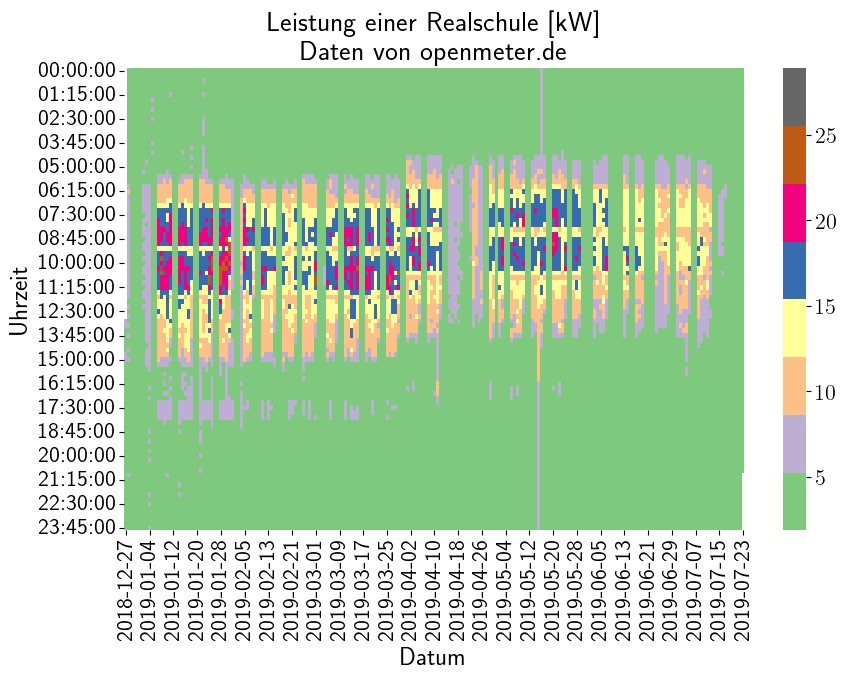

In [12]:
df['Datum'] = df.index.date
df['Uhrzeit'] = df.index.time
fig, ax = plt.subplots(figsize = (10,6))
sns.heatmap(df.pivot(index = 'Uhrzeit', columns = 'Datum', values = 'Leistung [kW]'), cmap = 'Accent')
ax.set_title('Leistung einer Realschule [kW]\n Daten von openmeter.de')

Diese Darstellung eignet sich, falls man die unterschiedlichen Leistungsbereiche deutlich differenzieren will. Ansonsten ist sie schwer verständlich.

### Prisma

Text(0.5, 1.0, 'Leistung einer Realschule [kW]\n Daten von openmeter.de')

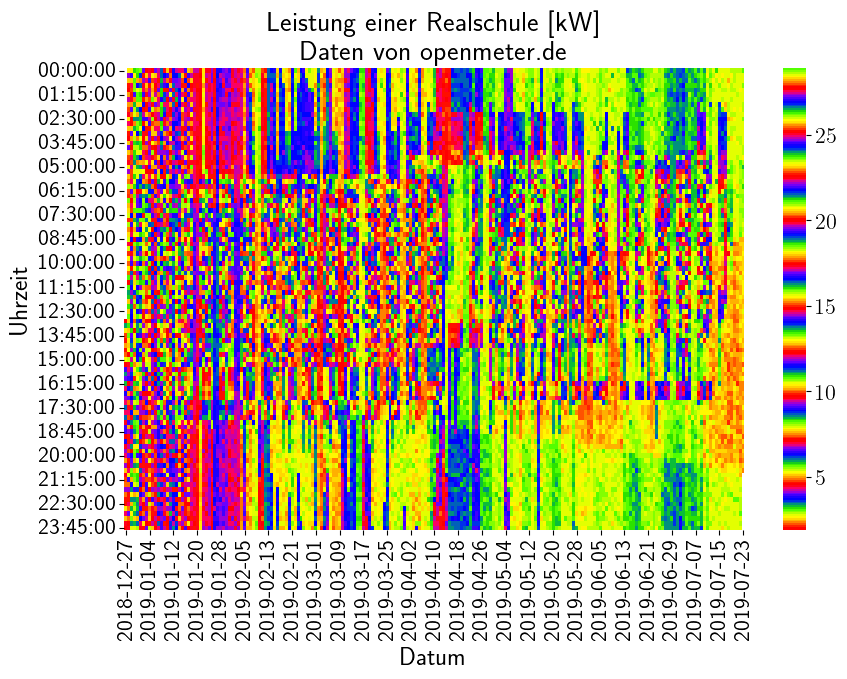

In [13]:
df['Datum'] = df.index.date
df['Uhrzeit'] = df.index.time
fig, ax = plt.subplots(figsize = (10,6))
sns.heatmap(df.pivot(index = 'Uhrzeit', columns = 'Datum', values = 'Leistung [kW]'), cmap = 'prism')
ax.set_title('Leistung einer Realschule [kW]\n Daten von openmeter.de')

Maximal verwirrend. Das ist auf jeden Fall nicht mehr verständlich und auch nicht wissenschaftlich. Welches Rot ist jetzt 5, 10, ... kW?

```{bibliography}
:filter: docname in docnames
```